In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data = pd.read_excel("Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_data = pd.read_excel("Test_Set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
data = train_data.append(test_data, sort=False)

In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [7]:
print(train_data.shape)
print(test_data.shape)
print(data.shape)

(10683, 11)
(2671, 10)
(13354, 11)


### Visualization

In [8]:
import seaborn as sns

In [9]:
data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

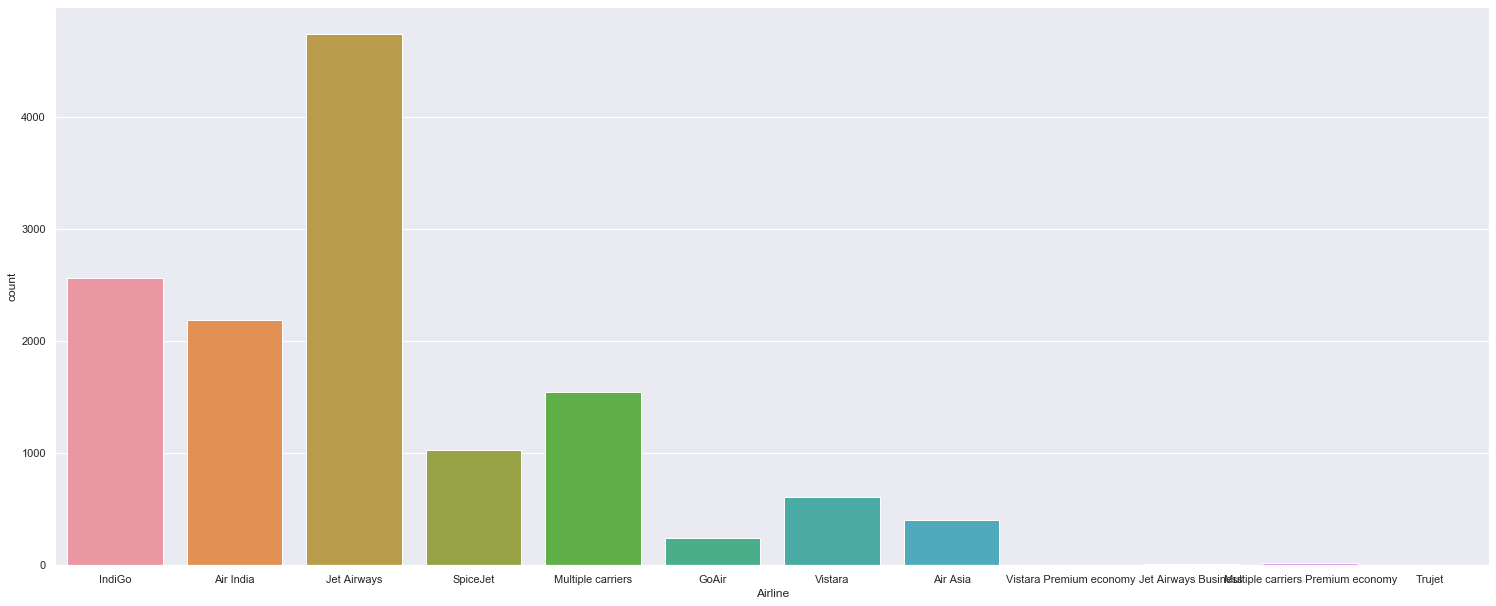

In [10]:
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(data['Airline'])

In [11]:
print(data['Source'].value_counts())
print(data['Destination'].value_counts())

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64
Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64


In [12]:
pd.crosstab(data['Source'],data['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1582,0,0,1170
Chennai,0,0,0,0,456,0
Delhi,0,5682,0,0,0,0
Kolkata,3581,0,0,0,0,0
Mumbai,0,0,0,883,0,0


In [13]:
pd.crosstab(data['Airline'],data['Total_Stops'])

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop
Airline,,,,,
Air Asia,160,14,0,0,231
Air India,663,964,46,2,516
GoAir,123,0,0,0,117
IndiGo,1017,26,0,0,1521
Jet Airways,3137,843,0,0,766
Jet Airways Business,5,2,0,0,1
Multiple carriers,1483,50,10,0,0
Multiple carriers Premium economy,16,0,0,0,0
SpiceJet,180,0,0,0,846


### Feature Extraction

In [14]:
data['Price'].fillna((data['Price'].mean()),inplace=True)

In [15]:
data['Day'] = data['Date_of_Journey'].str.split('/').str[0].astype(int)
data['Month'] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data['Year'] = data['Date_of_Journey'].str.split('/').str[2].astype(int)

In [16]:
data['Total_Stops'] = data['Total_Stops'].fillna('1 stop')
data['Total_Stops'] = data['Total_Stops'].replace('non-stop','0 stop')

In [17]:
data['Stops'] = data['Total_Stops'].str.split(' ').str[0].astype(int)

In [18]:
data['Arrival_Time'] = data['Arrival_Time'].str.split(" ").str[0]
data['Arr_Hr'] = data['Arrival_Time'].str.split(":").str[0].astype(int)
data['Arr_Min'] = data['Arrival_Time'].str.split(":").str[1].astype(int)

In [19]:
data['Dep_Time'] = data['Dep_Time'].str.split(" ").str[0]
data['Dep_Hr'] = data['Dep_Time'].str.split(":").str[0].astype(int)
data['Dep_Min'] = data['Dep_Time'].str.split(":").str[1].astype(int)

In [20]:
data['Stop1'] = data['Route'].str.split('→ ').str[0]
data['Stop2'] = data['Route'].str.split('→ ').str[1]
data['Stop3'] = data['Route'].str.split('→ ').str[2]
data['Stop4'] = data['Route'].str.split('→ ').str[3]
data['Stop5'] = data['Route'].str.split('→ ').str[4]

In [21]:
data['Stop1'].fillna('None',inplace=True)
data['Stop2'].fillna('None',inplace=True)
data['Stop3'].fillna('None',inplace=True)
data['Stop4'].fillna('None',inplace=True)
data['Stop5'].fillna('None',inplace=True)

In [22]:
drop_list = ['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops']

for i in drop_list:
    data = data.drop([i],axis=1)

In [23]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Day,Month,Year,Stops,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Stop1,Stop2,Stop3,Stop4,Stop5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [24]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Stops              0
Arr_Hr             0
Arr_Min            0
Dep_Hr             0
Dep_Min            0
Stop1              0
Stop2              0
Stop3              0
Stop4              0
Stop5              0
dtype: int64

In [25]:
data.dtypes

Airline             object
Source              object
Destination         object
Additional_Info     object
Price              float64
Day                  int32
Month                int32
Year                 int32
Stops                int32
Arr_Hr               int32
Arr_Min              int32
Dep_Hr               int32
Dep_Min              int32
Stop1               object
Stop2               object
Stop3               object
Stop4               object
Stop5               object
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

data["Airline"]=encoder.fit_transform(data['Airline'])
data["Source"]=encoder.fit_transform(data['Source'])
data["Destination"]=encoder.fit_transform(data['Destination'])
data["Additional_Info"]=encoder.fit_transform(data['Additional_Info'])
data["Stop1"]=encoder.fit_transform(data['Stop1'])
data["Stop2"]=encoder.fit_transform(data['Stop2'])
data["Stop3"]=encoder.fit_transform(data['Stop3'])
data["Stop4"]=encoder.fit_transform(data['Stop4'])
data["Stop5"]=encoder.fit_transform(data['Stop5'])

In [27]:
data['Prices'] = data['Price']
data = data.drop(['Price'],axis=1)
data.head()

,Airline,Source,Destination,Additional_Info,Day,Month,Year,Stops,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Stop1,Stop2,Stop3,Stop4,Stop5,Prices
0,3,0,5,8,24,3,2019,0,1,10,22,20,0,13,24,12,4,3897.0
1,1,3,0,8,1,5,2019,2,13,15,5,50,2,25,1,3,4,7662.0
2,4,2,1,8,9,6,2019,2,4,25,9,25,3,32,4,5,4,13882.0
3,3,3,0,8,12,5,2019,1,23,30,18,5,2,34,3,12,4,6218.0
4,3,0,5,8,1,3,2019,1,21,35,16,50,0,34,8,12,4,13302.0


In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

new_data = sc.fit_transform(data)

In [29]:
pd.DataFrame(new_data).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.413335,-1.658032,2.419412,0.494228,1.257314,-1.467576,0.0,-1.224526,-1.797602,-0.885564,1.653879,-0.239345,-1.672248,0.134939,1.375580,0.408035,0.062198,-1.258413
1,-1.259391,0.887440,-0.974301,0.494228,-1.468210,0.248312,0.0,1.740268,-0.057434,-0.583615,-1.309829,1.353715,-0.012984,1.628294,-1.170082,-3.050120,0.062198,-0.345529
2,0.009693,0.038949,-0.295559,0.494228,-0.520201,1.106255,0.0,1.740268,-1.362560,0.020282,-0.612486,0.026165,0.816648,2.499418,-0.838039,-2.281641,0.062198,1.162608
3,-0.413335,0.887440,-0.974301,0.494228,-0.164698,0.248312,0.0,0.257871,1.392705,0.322231,0.956536,-1.035875,-0.012984,2.748310,-0.948720,0.408035,0.062198,-0.695650
4,-0.413335,-1.658032,2.419412,0.494228,-1.468210,-1.467576,0.0,0.257871,1.102677,0.624180,0.607864,1.353715,-1.672248,2.748310,-0.395315,0.408035,0.062198,1.021978
5,1.701806,0.887440,-0.974301,0.494228,1.257314,1.106255,0.0,-1.224526,-0.347462,0.020282,-0.612486,-1.301385,-0.012984,-0.860630,1.375580,0.408035,0.062198,-1.264232
6,0.009693,-1.658032,2.419412,-2.009219,-0.164698,-1.467576,0.0,0.257871,-0.492476,0.020282,0.956536,1.619226,-1.672248,-0.611738,-0.395315,0.408035,0.062198,0.484916
7,0.009693,-1.658032,2.419412,0.494228,-1.468210,-1.467576,0.0,0.257871,-1.217546,-1.187513,-0.786822,-1.301385,-1.672248,-0.611738,-0.395315,0.408035,0.062198,3.196411
8,0.009693,-1.658032,2.419412,-2.009219,-0.164698,-1.467576,0.0,0.257871,-0.492476,0.020282,-0.786822,1.619226,-1.672248,-0.611738,-0.395315,0.408035,0.062198,0.484916
9,0.855750,0.038949,-0.295559,0.494228,1.612817,0.248312,0.0,0.257871,0.812649,-0.583615,-0.263814,0.026165,0.816648,-0.611738,-0.616677,0.408035,0.062198,-0.112035


### Feature Selection

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn .model_selection import train_test_split

In [31]:
train = new_data[0:10683]
test = new_data[10683:]

In [32]:
X = train[:, :-1]
y = train[:, -1]

In [33]:
print(np.shape(X),np.shape(y))

(10683, 17) (10683,)


In [34]:
pd.DataFrame(y).head(10)

,0
0,-1.258413
1,-0.345529
2,1.162608
3,-0.695650
4,1.021978
5,-1.264232
6,0.484916
7,3.196411
8,0.484916
9,-0.112035


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1, verbose=True )
svr.fit(X_train,y_train)

[LibSVM]

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [38]:
svr_score = svr.score(X_test,y_test)
svr_score

0.7902936421915034